<h1><strong>CSE 555 - Introduction to Pattern Recognition</strong></h1>

<h2><strong>Programming Assignment 5 :- Generative Models</strong></h2>
<h4><strong> Jyoti Sinha</strong></h4>

In [ ]:
#!git clone https://github.com/tensorflow/tensorflow.git

<h3>Importing packages</h3>

In [ ]:
!pip install -U dm-sonnet==1.23
!pip install --upgrade tensorflow-probability
!pip install tensorflow==2.0.0

Requirement already up-to-date: dm-sonnet==1.23 in /Users/jyoti/anaconda3/lib/python3.7/site-packages (1.23)
Requirement already up-to-date: tensorflow-probability in /Users/jyoti/anaconda3/lib/python3.7/site-packages (0.9.0)
  Using cached https://files.pythonhosted.org/packages/2c/72/6b3264aa2889b7dde7663464b99587d95cd6a5f3b9b30181f14d78a63e64/tensorflow-2.0.0-cp37-cp37m-macosx_10_11_x86_64.whl


<h3> Importing</h3>

In [ ]:
import input_data
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


<h3> Importing dataset</h3>

In [ ]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)
train_X, train_Y, test_X, test_Y = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


<h3>Displaying some digits</h3>

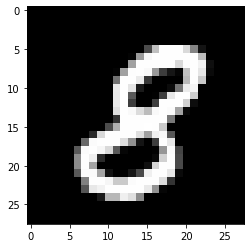

In [ ]:
img = mnist.train.images[5]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

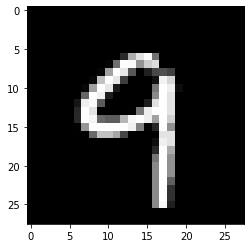

In [ ]:
img = mnist.train.images[8]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

<h3>Encoding</h3>

In [ ]:
inputs_dim = tf.placeholder(tf.float32, (None, 28, 28, 1), name='input_dim')
output = tf.placeholder(tf.float32, (None, 28, 28, 1), name='output')
convoluion1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs_dim)
maxpooling1 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(convoluion1)
convoluion2 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(maxpooling1)
maxpooling2 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(convoluion2)
convoluion3 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(maxpooling2)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(convoluion3) 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


<h3> Decoding</h3>

In [ ]:
convoluion4= tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
upsample1 = tf.keras.layers.UpSampling2D((2, 2))(convoluion4)
convoluion5 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(upsample1 )
upsample2 = tf.keras.layers.UpSampling2D((2, 2))(convoluion5)
convoluion6 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(upsample2)
upsample3 = tf.keras.layers.UpSampling2D((2, 2))(convoluion6)
convolution7 = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(upsample3 )

<h3>Calculation of error,opt and cost</h3>

In [ ]:
loss= tf.losses.mean_squared_error(output,convolution7 )
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [ ]:
sess = tf.Session()

In [ ]:
batchsize = 200
epochs=2
sess.run(tf.global_variables_initializer())
for a in range(epochs):
    for b in range(mnist.train.num_examples//batchsize):
        batch_dim = mnist.train.next_batch(batchsize)
        image_dim = batch_dim[0].reshape((-1, 28, 28, 1))
        costbatch, _ = sess.run([cost, opt], feed_dict={inputs_dim: image_dim ,output: image_dim })
        print("Epoch: {}/{}...".format(a+1, epochs),"Training loss: {:.4f}".format(costbatch))

Epoch: 1/2... Training loss: 0.2333
Epoch: 1/2... Training loss: 0.2307
Epoch: 1/2... Training loss: 0.2286
Epoch: 1/2... Training loss: 0.2274
Epoch: 1/2... Training loss: 0.2246
Epoch: 1/2... Training loss: 0.2216
Epoch: 1/2... Training loss: 0.2175
Epoch: 1/2... Training loss: 0.2133
Epoch: 1/2... Training loss: 0.2077
Epoch: 1/2... Training loss: 0.2007
Epoch: 1/2... Training loss: 0.1913
Epoch: 1/2... Training loss: 0.1831
Epoch: 1/2... Training loss: 0.1721
Epoch: 1/2... Training loss: 0.1611
Epoch: 1/2... Training loss: 0.1504
Epoch: 1/2... Training loss: 0.1421
Epoch: 1/2... Training loss: 0.1316
Epoch: 1/2... Training loss: 0.1245
Epoch: 1/2... Training loss: 0.1255
Epoch: 1/2... Training loss: 0.1189
Epoch: 1/2... Training loss: 0.1198
Epoch: 1/2... Training loss: 0.1206
Epoch: 1/2... Training loss: 0.1205
Epoch: 1/2... Training loss: 0.1131
Epoch: 1/2... Training loss: 0.1144
Epoch: 1/2... Training loss: 0.1160
Epoch: 1/2... Training loss: 0.1146
Epoch: 1/2... Training loss:

<h3>Plotting the digits</h3>

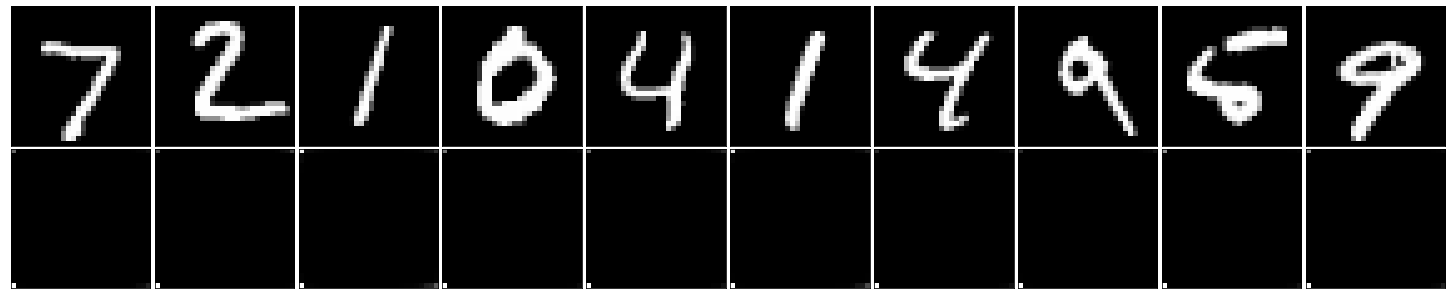

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(convolution7, feed_dict={inputs_dim: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
fig.tight_layout(pad=0.1)

In [ ]:
sess.close()